In [1]:
#OM NAMO NARAYANA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from skimage.filters import gaussian
from PIL import Image
from PIL import ImageFilter

In [3]:
root_dir = 'D:/darkSight/datasets_darkSight/images/'
save_dir = 'D:/darkSight/'

<h4>Rescaling the image </h4>

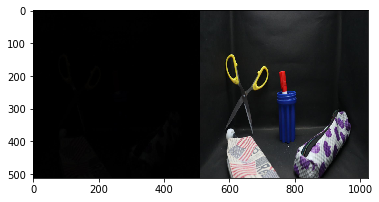

In [2]:
originalb = plt.imread('/mnt/d_drive/Drive/Code/Dark-Sight/DarkNet/results/gt.jpg')
darkb = plt.imread('/mnt/d_drive/Drive/Code/Dark-Sight/DarkNet/results/inp.jpg')

scale_percent = 50 # percent of original size
width = int(darkb.shape[1] * scale_percent / 100)
height = int(darkb.shape[0] * scale_percent / 100)
dim = (width, height)
dark = cv2.resize(darkb, dim, interpolation = cv2.INTER_AREA)
original = cv2.resize(originalb, dim, interpolation = cv2.INTER_AREA)
plt.imshow(np.hstack((dark, original)))

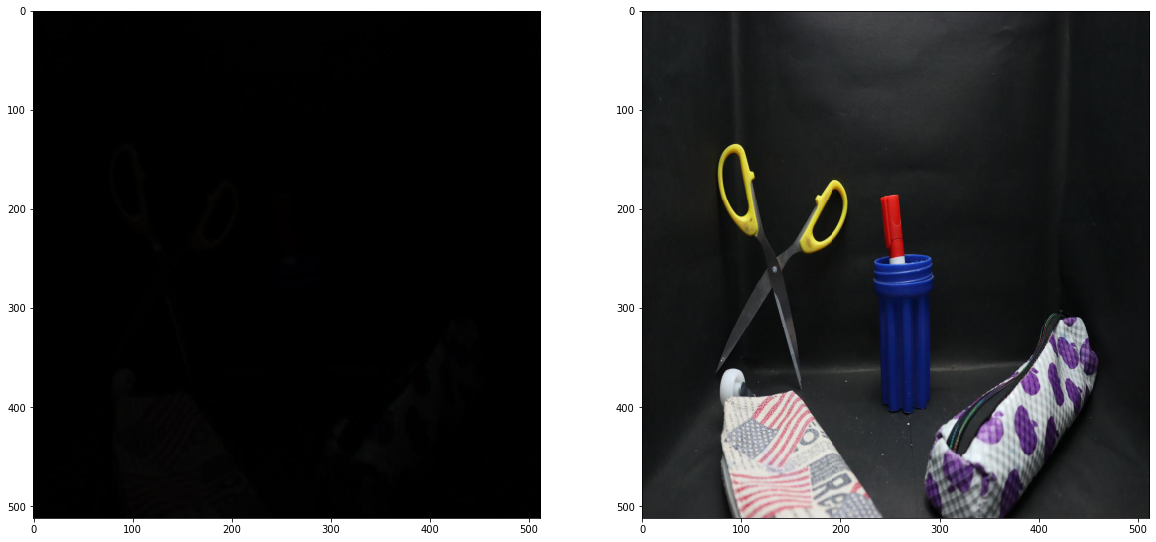

In [3]:
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax[0].imshow(dark)
ax[1].imshow(original)

<h3>histagram analysis</h3>

In [4]:
dark_g = cv2.calcHist([dark], [2] , None, [256], [0, 256])

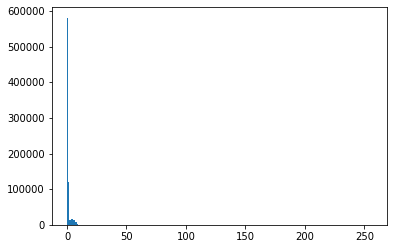

In [5]:
plt.hist(dark.ravel(), 256, [0, 256]);
plt.show()

Clearly the histagram shows the image is dark

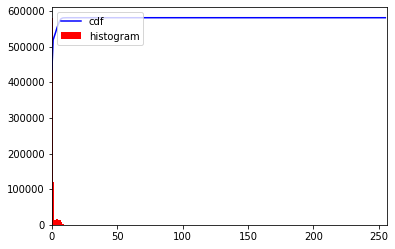

In [6]:
img = dark

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [7]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [8]:
img2 = cdf[img]

In [9]:
r = img.T[0].T
g =img.T[1].T
b = img.T[2].T

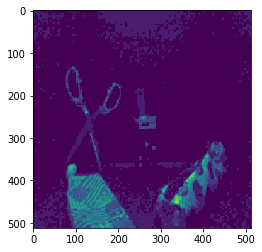

In [10]:
plt.imshow(b)

In [11]:
imgm = [[], [], []]

In [12]:
rm, gm, bm = cv2.equalizeHist(r), cv2.equalizeHist(g), cv2.equalizeHist(b)
imgm[0], imgm[1], imgm[2] = rm.T, gm.T, bm.T

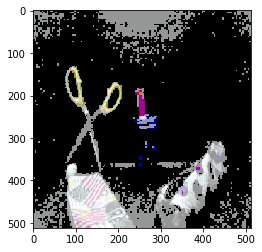

In [13]:
imgm = np.array(imgm).T
plt.imshow(imgm)

In [14]:
res = np.hstack((img, imgm))
plt.imsave(save_dir+'result.png', res)
plt.imshow(res)

NameError: name 'save_dir' is not defined

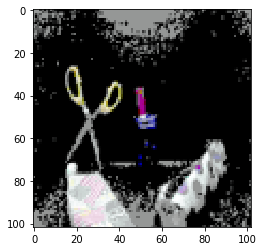

In [15]:
scale_percent = 20 # percent of original size
width = int(imgm.shape[1] * scale_percent / 100)
height = int(imgm.shape[0] * scale_percent / 100)
dim = (width, height)
limgm = cv2.resize(imgm, dim, interpolation = cv2.INTER_AREA)
plt.imshow(limgm)

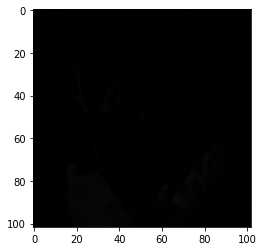

In [16]:
scale_percent = 20 # percent of original size
width = int(dark.shape[1] * scale_percent / 100)
height = int(dark.shape[0] * scale_percent / 100)
dim = (width, height)
ldarkm = cv2.resize(dark, dim, interpolation = cv2.INTER_AREA)
plt.imshow(ldarkm)

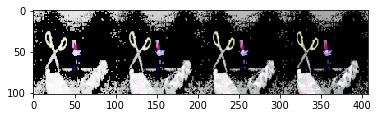

In [17]:
im_list = []
for i in range(2, 10, 2):
    im_list.append(cv2.pow(limgm/255,i/10))
gamma_res = np.hstack((im_list))
plt.imshow(gamma_res)

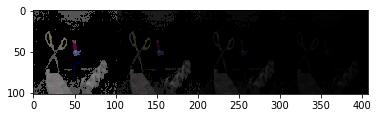

In [18]:
dark_list = []
for i in range(2, 10, 2):
    dark_list.append(cv2.pow(ldarkm/255,i/10))
gamma_res = np.hstack((dark_list))
plt.imshow(gamma_res)

In [24]:
plt.imsave(save_dir + 'gamma_enhancememt_dark.png', gamma_res)

In [27]:
plt.imsave(save_dir + 'heimg.png', limgm)

<h1>LOCAL CONTRAST</h1>

<h3>Increasing local contrast by sharpening the image</h3>

reference: 
http://www.dl-c.com/Temp/downloads/Whitepapers/Local%20Contrast%20Enhancement.pdf

In [29]:
# Open an already existing image
imageObject = Image.open(save_dir + "heimg.png");
imageObject.show();

# Apply sharp filter
sharpened1 = imageObject.filter(ImageFilter.SHARPEN);
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);

# Show the sharpened images
sharpened1.show();
sharpened2.show();

The results are not satisfactory :|